In [1]:
import numpy as np
import pandas as pd

In [2]:
def read_data(file_path):
    data = pd.read_csv(file_path)
    return data

data = read_data('../data/ai4i2020.csv')
print(data.iloc[:5, :]) 
print(data.shape)

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [3]:
data = data.iloc[:, 2:]
print(data.iloc[:5, :]) 

  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0         42.8                0                0    0    0    0    0    0  
1         46.3                3                0    0    0    0    0    0  
2         49.4                5                0    0    0    0    0    0  
3         39.5                7                0    0    0    0    0    0  
4         40.0                9                0    0    0    0    0    0  


In [4]:
data['delta_temp'] = -data['Air temperature [K]'] + data['Process temperature [K]']
data['power'] = data['Rotational speed [rpm]'] * data['Torque [Nm]'] * (np.pi / 30)
data['torque_wear'] = data['Tool wear [min]']* data['Torque [Nm]']
print(data.iloc[:5, :])

  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  \
0         42.8                0                0    0    0    0    0    0   
1         46.3                3                0    0    0    0    0    0   
2         49.4                5                0    0    0    0    0    0   
3         39.5                7                0    0    0    0    0    0   
4         40.0                9                0    0    0    0    0    0   

   delta_temp        power  torque_wear  
0        10.5 

In [5]:
import sys
sys.path.append('..')
from utils.pt_feature import pt_feature

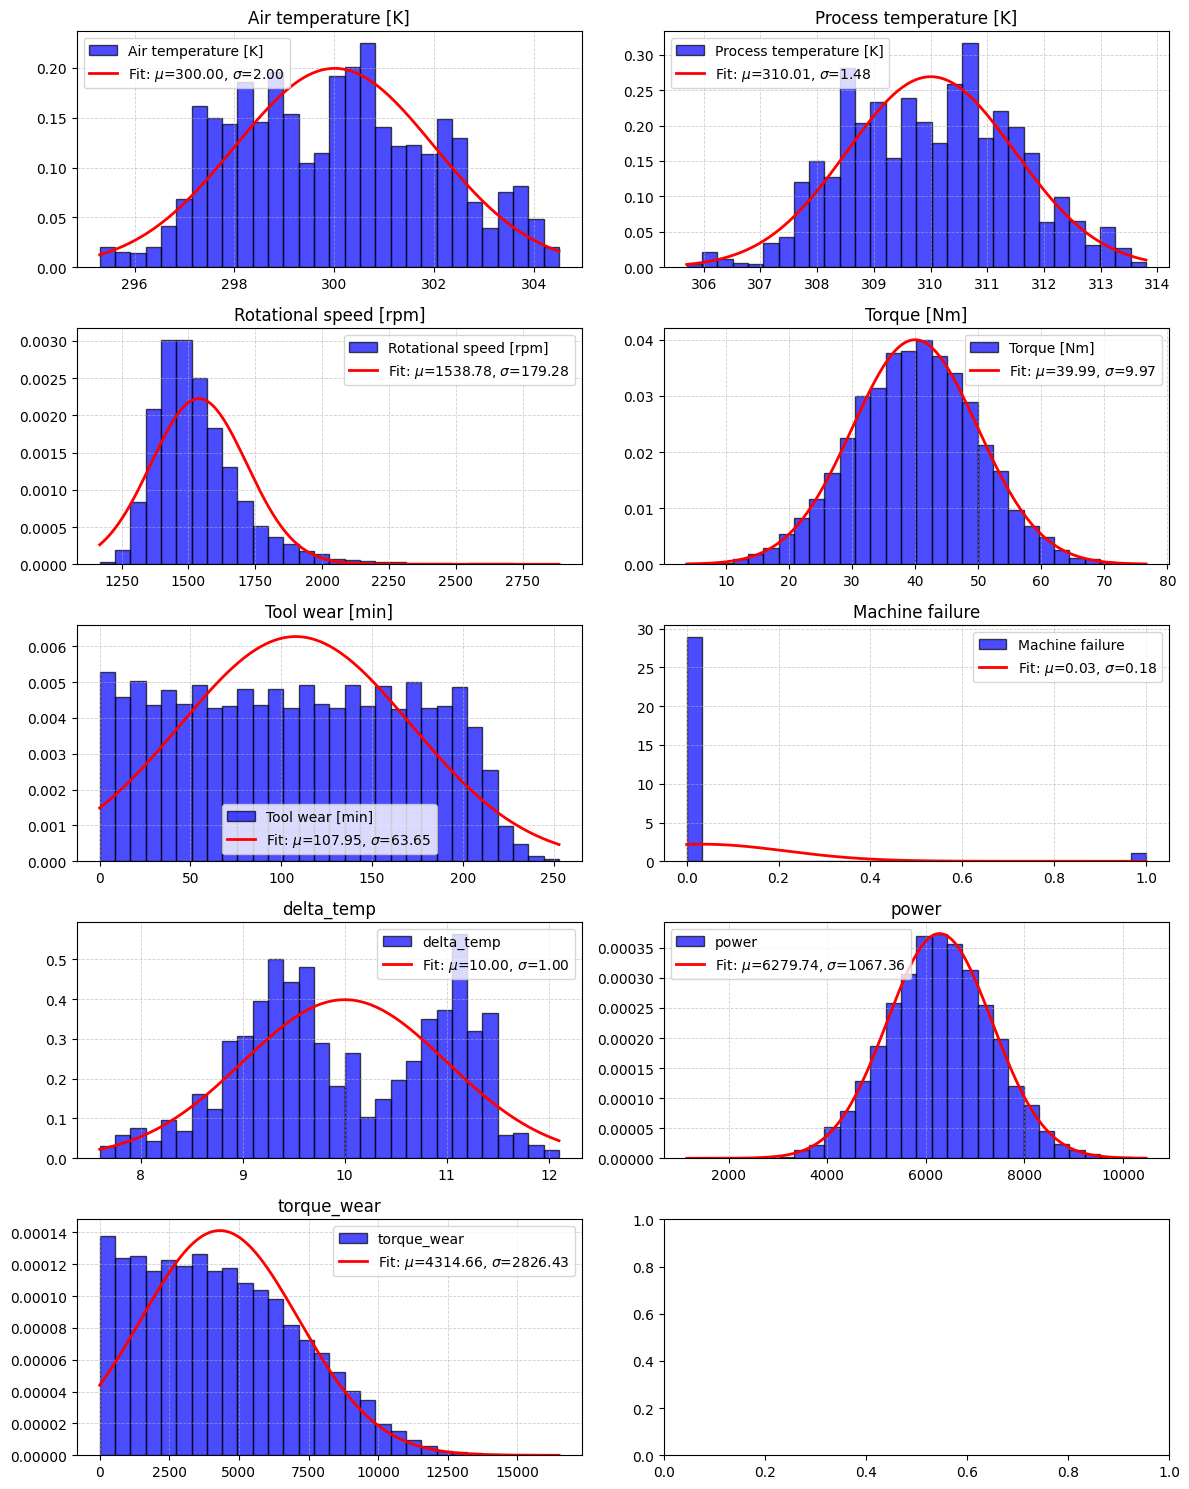

In [6]:
ns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
      'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'delta_temp', 'power', 'torque_wear']
pt = pt_feature(data, axes_shape=(len(ns)//2+1, 2), figsize=(12, 3* (len(ns)//2+1)))
for col in ns:
    pt.plot_feature(col)

In [7]:
def numeric(x):
    return (x - x.mean()) / (x.std())

def uniform(x):
    return (x - x.min()) / (x.max() - x.min())

numeric_cols = [
    "Air temperature [K]", 
    "Process temperature [K]", 
    "Rotational speed [rpm]", 
    "Torque [Nm]", 
    "delta_temp",
    "power",
    "torque_wear"
]

data[numeric_cols] = numeric(data[numeric_cols])
data["Tool wear [min]"] = uniform(data["Tool wear [min]"])
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,delta_temp,power,torque_wear
0,M,-0.952342,-0.947313,0.068182,0.282186,0.000000,0,0,0,0,0,0,0.498824,0.629412,-1.526468
1,L,-0.902348,-0.879915,-0.729435,0.633276,0.011858,0,0,0,0,0,0,0.498824,0.512431,-1.477327
2,L,-0.952342,-1.014710,-0.227438,0.944242,0.019763,0,0,0,0,0,0,0.398934,1.376820,-1.439083
3,L,-0.902348,-0.947313,-0.589992,-0.048843,0.027668,0,0,0,0,0,0,0.398934,-0.329993,-1.428646
4,L,-0.902348,-0.879915,-0.729435,0.001313,0.035573,0,0,0,0,0,0,0.498824,-0.357806,-1.399105


In [8]:
data = pd.get_dummies(data)
data.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,delta_temp,power,torque_wear,Type_H,Type_L,Type_M
0,-0.952342,-0.947313,0.068182,0.282186,0.000000,0,0,0,0,0,0,0.498824,0.629412,-1.526468,False,False,True
1,-0.902348,-0.879915,-0.729435,0.633276,0.011858,0,0,0,0,0,0,0.498824,0.512431,-1.477327,False,True,False
2,-0.952342,-1.014710,-0.227438,0.944242,0.019763,0,0,0,0,0,0,0.398934,1.376820,-1.439083,False,True,False
3,-0.902348,-0.947313,-0.589992,-0.048843,0.027668,0,0,0,0,0,0,0.398934,-0.329993,-1.428646,False,True,False
4,-0.902348,-0.879915,-0.729435,0.001313,0.035573,0,0,0,0,0,0,0.498824,-0.357806,-1.399105,False,True,False


In [9]:
data = data.astype(np.float64)
data.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,delta_temp,power,torque_wear,Type_H,Type_L,Type_M
0,-0.952342,-0.947313,0.068182,0.282186,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.498824,0.629412,-1.526468,0.0,0.0,1.0
1,-0.902348,-0.879915,-0.729435,0.633276,0.011858,0.0,0.0,0.0,0.0,0.0,0.0,0.498824,0.512431,-1.477327,0.0,1.0,0.0
2,-0.952342,-1.014710,-0.227438,0.944242,0.019763,0.0,0.0,0.0,0.0,0.0,0.0,0.398934,1.376820,-1.439083,0.0,1.0,0.0
3,-0.902348,-0.947313,-0.589992,-0.048843,0.027668,0.0,0.0,0.0,0.0,0.0,0.0,0.398934,-0.329993,-1.428646,0.0,1.0,0.0
4,-0.902348,-0.879915,-0.729435,0.001313,0.035573,0.0,0.0,0.0,0.0,0.0,0.0,0.498824,-0.357806,-1.399105,0.0,1.0,0.0


In [10]:
data = data.copy()
data.columns = data.columns.astype(str)
data.columns = (
    data.columns
    .str.replace('[', '_', regex=False)
    .str.replace(']', '_', regex=False)
    .str.replace(' ', '_', regex=False)
)
data.head()

,Air_temperature__K_,Process_temperature__K_,Rotational_speed__rpm_,Torque__Nm_,Tool_wear__min_,Machine_failure,TWF,HDF,PWF,OSF,RNF,delta_temp,power,torque_wear,Type_H,Type_L,Type_M
0,-0.952342,-0.947313,0.068182,0.282186,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.498824,0.629412,-1.526468,0.0,0.0,1.0
1,-0.902348,-0.879915,-0.729435,0.633276,0.011858,0.0,0.0,0.0,0.0,0.0,0.0,0.498824,0.512431,-1.477327,0.0,1.0,0.0
2,-0.952342,-1.014710,-0.227438,0.944242,0.019763,0.0,0.0,0.0,0.0,0.0,0.0,0.398934,1.376820,-1.439083,0.0,1.0,0.0
3,-0.902348,-0.947313,-0.589992,-0.048843,0.027668,0.0,0.0,0.0,0.0,0.0,0.0,0.398934,-0.329993,-1.428646,0.0,1.0,0.0
4,-0.902348,-0.879915,-0.729435,0.001313,0.035573,0.0,0.0,0.0,0.0,0.0,0.0,0.498824,-0.357806,-1.399105,0.0,1.0,0.0


In [11]:
with open('../data/ai4i2020_processed.csv', 'w') as f:
    data.to_csv(f, index=False)

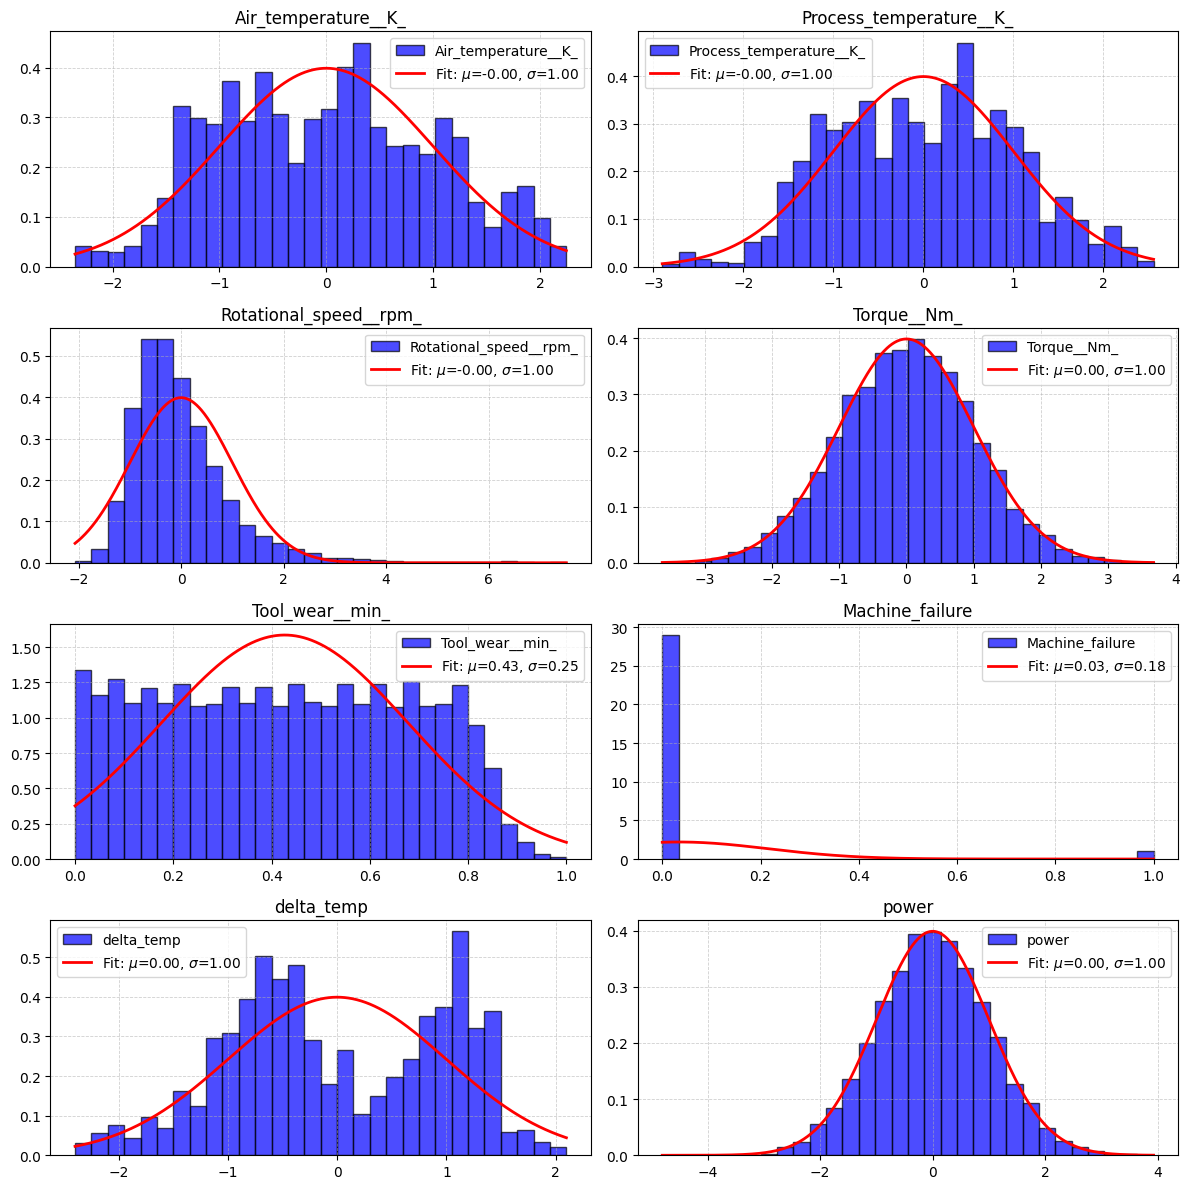

In [12]:
ns = ['Air_temperature__K_', 'Process_temperature__K_', 'Rotational_speed__rpm_',
      'Torque__Nm_', 'Tool_wear__min_', 'Machine_failure', 'delta_temp', 'power']
pt = pt_feature(data, axes_shape=(len(ns)//2, 2), figsize=(12, 3* (len(ns)//2)))
for col in ns:
    pt.plot_feature(col)